In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from scipy import stats
import emoji


sb.set() # set the default Seaborn style for graphics

In [4]:
#Importing data set
traindata = pd.read_csv('test_data2.csv')
traindata.head()

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,is_mature,follow_count,total_views
0,45141548204,27115917,kamet0,Kamet0,509658.0,Just Chatting,live,REDDIT WAR | ON FAIT LA GUERRE SUR LE R/PLACE ...,272883,2022-04-04T10:20:45Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,['6f655045-9989-4ef7-8f85-1edcec42d648'],False,1230588,102061711
1,46069421021,83232866,ibai,ibai,509658.0,Just Chatting,live,GUERRA EN REDDIT | ÚLTIMO DÍA | HOY SE DECIDE ...,251355,2022-04-04T13:41:21Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,9770181,350406048
2,46069834125,459331509,auronplay,auronplay,509658.0,Just Chatting,live,GUERRA EN REDDIT? Y POR QUÉ NO NOS BESAMOS? NO...,165692,2022-04-04T14:47:47Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,12255320,256207080
3,45142671692,622498423,otplol_,otplol_,21779.0,League of Legends,live,EUM PLAY-IN - KCORP / VIT EN DUPLEX - JOUR 1 -...,89981,2022-04-04T14:30:12Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,"['6f655045-9989-4ef7-8f85-1edcec42d648', '36a8...",False,505006,96518958
4,46069561085,39426641,evelone192,Evelone192,509658.0,Just Chatting,live,Pixel battle Freak,42746,2022-04-04T14:03:28Z,ru,https://static-cdn.jtvnw.net/previews-ttv/live...,['0569b171-2a2b-476e-a596-5bdfb45a1327'],False,2085936,98111163


Predicting LiveViewCount using FollowCount

In [276]:
LiveViewerCount = pd.DataFrame(traindata["viewer_count"])
LiveViewerCount.describe()

,viewer_count
count,22498.000000
mean,399.233621
std,3887.617151
min,8.000000
25%,24.000000
50%,42.000000
75%,104.000000
max,272883.000000


In [277]:
FollowCount = pd.DataFrame(traindata["follow_count"])
FollowCount.describe()

,follow_count
count,2.249800e+04
mean,5.675228e+04
std,4.202539e+05
min,0.000000e+00
25%,1.282000e+03
50%,4.369500e+03
75%,1.700075e+04
max,1.753082e+07


In [278]:
# Import Scikit-Learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(FollowCount, LiveViewerCount)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creating train & test data sets
# for view_count & follower_count

In [279]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Split the Dataset into Train and Test Data
    x_train, x_test, y_train, y_test = train_test_split(FollowCount, LiveViewerCount, test_size = 0.20)
    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

<AxesSubplot:>

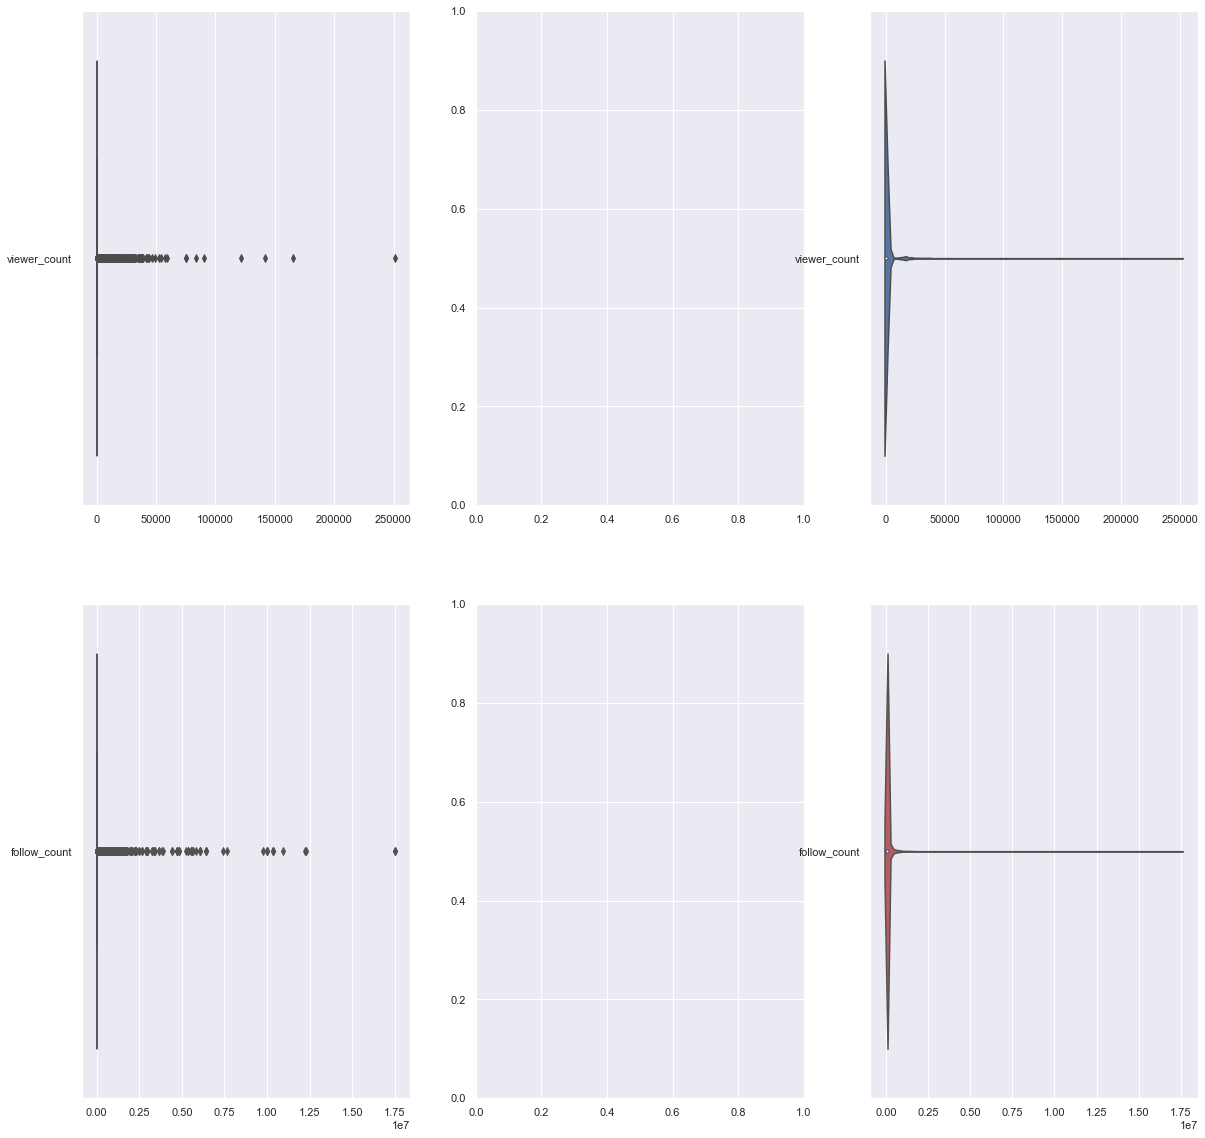

In [280]:
# Set up the matplotlib figure with 3 subplots
f, axes = plt.subplots(2,3, figsize = (20,20))

# SalePrice
sb.boxplot(data = y_train, orient = 'h', ax = axes[0,0])
#sb.histplot(data = y_train, kde = True, ax = axes[0,1])
sb.violinplot(data = y_train, orient = 'h', ax = axes[0,2])

# GroundArea
sb.boxplot(data = x_train, orient = 'h', color = 'r', ax = axes[1,0])
#sb.histplot(data = x_train, kde = True, palette = ['Red'], ax = axes[1,1])
sb.violinplot(data = x_train, orient = 'h', color = 'r', ax = axes[1,2])



<AxesSubplot:xlabel='total_views', ylabel='viewer_count'>

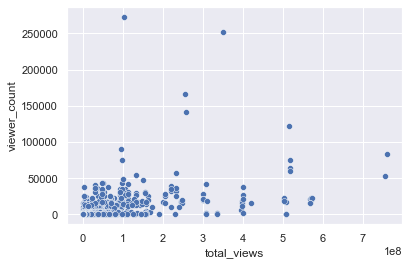

In [281]:
sb.scatterplot(data=traindata,x="total_views",y="viewer_count")

Intercept 	: b =  [127.05181834]
Coefficients 	: a =  [[8.31296726e-05]]


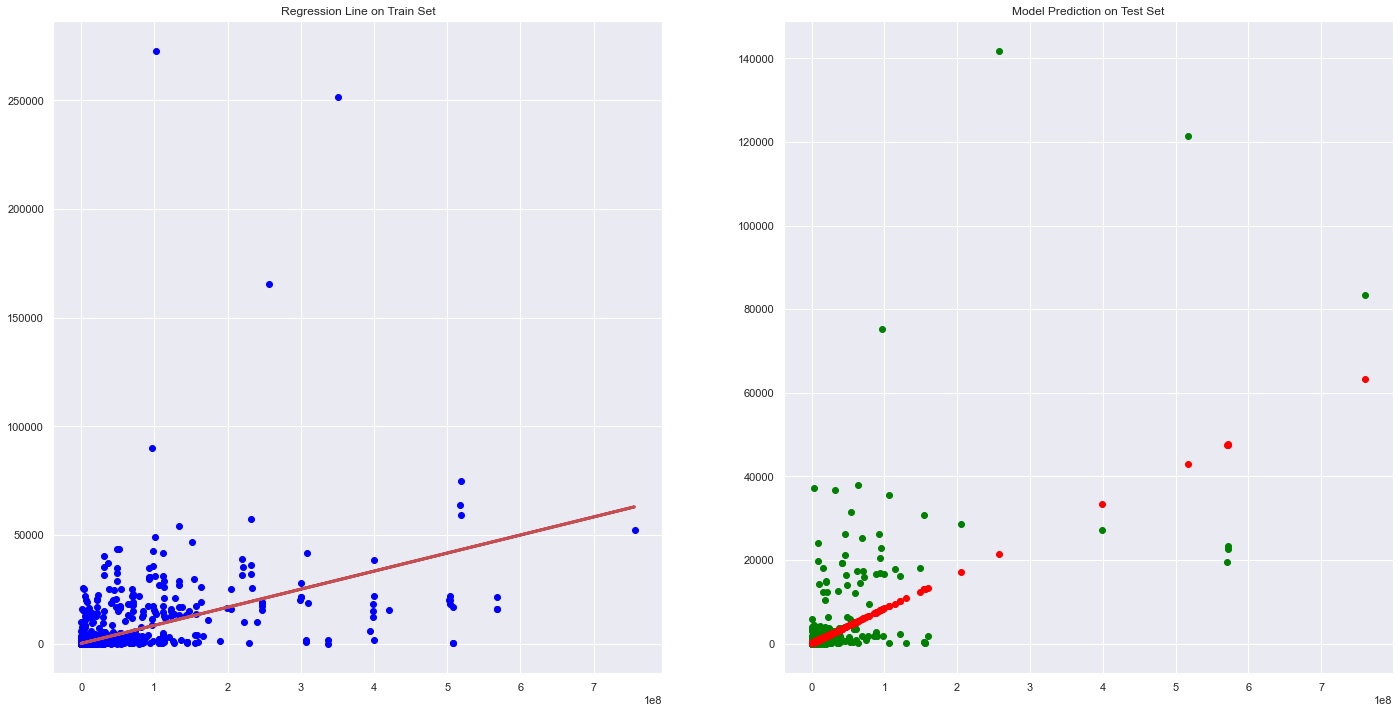

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23416808358979824
Mean Squared Error (MSE) 	: 11565686.81526991

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 9025188.050983531



In [282]:
univariateLinearRegression(Xvar = "total_views", yvar = "viewer_count", df = traindata)

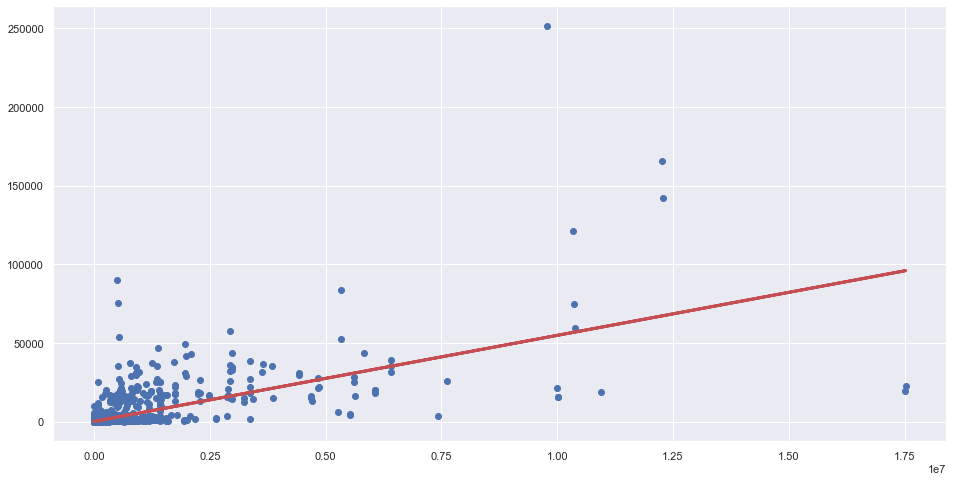

In [283]:
# Formulae for Regression Line
regline_x = x_train
regline_y = linreg.coef_ * x_train + linreg.intercept_

# Ploting Regression Line
f = plt.figure(figsize = (16,8))
plt.scatter(x_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Intercept of Regression 	: c =  [71.40370138]
Coefficients of Regression 	: m =  [[0.00585918]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.44042781284328614
Mean Squared Error (MSE) 	: 7663872.037733853
Root Mean Squared Error (RMSE) :  2768.3699242936905

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.10369638602503684
Mean Squared Error (MSE) 	: 18623868.672195967
Root Mean Squared Error (RMSE) :  4315.538051297424



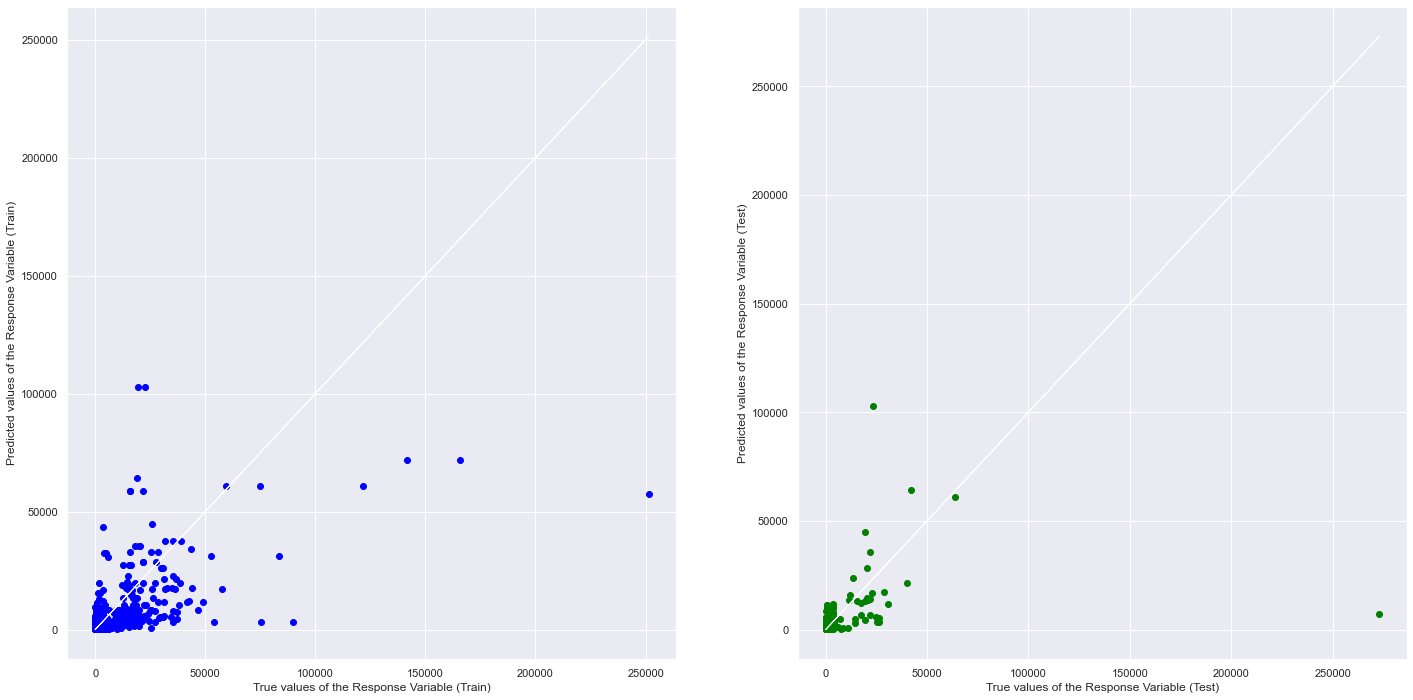

In [284]:
# Linear Regression Using Train Data
linregR = LinearRegression()
linregR.fit(x_train, y_train)

# Formulae for Regression Line
regline_x = x_train
regline_y = linreg.coef_ * x_train + linreg.intercept_

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: c = ', linregR.intercept_)
print('Coefficients of Regression \t: m = ', linregR.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linregR.predict(x_train)
y_test_pred = linregR.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linregR.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linregR.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Cleaning outliers for view_count

In [201]:
targetData = traindata['viewer_count'].copy()

3002

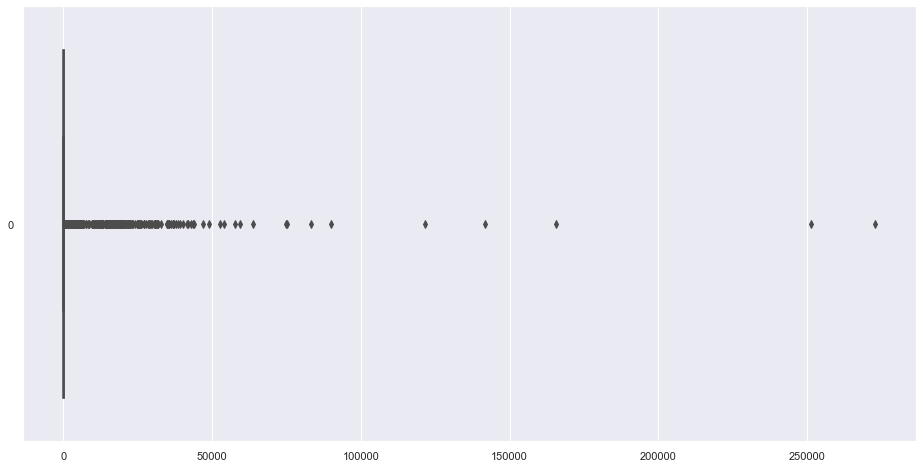

In [202]:
# Draw the boxplots
f, axes = plt.subplots(1, 1, figsize=(16, 8))

#sb.boxplot(data = targetData["title"], orient = "h", ax = axes[0])
sb.boxplot(data = targetData, orient = "h")

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)


# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()


In [203]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

0         True
1         True
2         True
3         True
4         True
         ...  
22493    False
22494    False
22495    False
22496    False
22497    False
Name: viewer_count, Length: 22498, dtype: bool

In [204]:
# Find the rows where ANY column is True
#outliers = rule.any()   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
print(outliers)

True


In [205]:
# How many points are outliers for the two variables combined?
rule.value_counts()

False    19496
True      3002
Name: viewer_count, dtype: int64

In [212]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = rule.index[rule == True]
print(outlierindices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20313, 20314, 20315, 20316, 20317, 20318, 20319, 20320, 20321,
            20322],
           dtype='int64', length=3002)


In [209]:
# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
#targetData


218
218
218
218
217
217
217
217
216
216
216
215
215
215
215
214
214
214
214
214
214
214
213
213
213
203
203
202
202
202
202
202
202
202
202
201
201
201
201
201
201
200
200
200
200
200
200
200
200
200
189
189
189
188
188
188
188
188
187
187
187
186
186
186
186
186
186
186
186
186
185
185
185
185
185
175
175
175
175
175
175
175
174
174
174
174
174
174
173
173
173
173
173
173
173
172
172
172
172
172
164
164
164
164
163
163
163
163
163
163
163
162
162
162
162
162
162
162
162
162
162
162
162
161
161
154
154
154
154
154
154
154
154
154
154
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
146
146
146
146
146
145
145
145
145
145
145
145
145
145
145
145
145
144
144
144
144
144
144
144
144
138
138
138
138
138
138
138
138
138
138
138
138
137
137
137
137
137
137
137
137
136
136
136
136
136
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
130
130
130
130
130
130
130
125
125
125
125
125
125
125
125
125
125
125
124
124
124
124
124
124
124
124
124
124
124
124
124
124


28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
31
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
25
24
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
27
26
26
24
22
22
22
22
22
2

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
224
224
224
224
224
223
223
223
223
222
222
222
222
222
210
210
210
209
209
209
209
209
209
209
208
208
208
208
208
208
208
208
207
207
207
206
206
206
206
197
197
197
196
196
196
196
196
196
196
196
196
196
196
196
195
195
195
195
195
194
194
194
194
194
184
184
184
184
184
184
184
184
183
183
183
183
183
183
183
183
183
183
182
182
182
181
181
181
180
173
172
172
172
172
172
172
172
172
172
171
171
171
171
171
171
171
171
171
170
170
170
170
170
170
162
162
162
162
162
162
162
162
161
161
161
161
161
161
161
161
160
160
160
160
160
160
160
160
160
154
153
153
153
153
153
153
153
153
153
153
153
153
153
153
152
152
152
152
152
152
152
152
152
152
147
147
147
147
147
147
147
146
146
146
146
146
146
146
146
146
146
146
146
146
14

49
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
56
50
49
47
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
49
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
43
41
41
41
41
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
45
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
40
39
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
43
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
3

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
70
70
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
68
69
67
67
67
67
67
67
67
67
67
67
67
67
67
66
66
66
66
66
66
66
66
66
66
66
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
63
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
61
61
61
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
59
59
59
59
59
59
59
59
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
53
53
53
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
50
50
50
50
50
50
50
50
50
50
50
49
49
49
49
49
49
49
49
49
49
49
49
49
49
48
48
48
48
48
48
48
48
4

24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
24
23
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
24
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
22
22
21
20
20
20
20
20
20
20
20
20
20
2

In [272]:
#univariateLinearRegression(Xvar = "total_views", yvar = "viewer_count", df = targetData)

# Average number of viewers per stream of every game

In [271]:
gameName = traindata['game_name']
gameCount = len(gameName.unique())
print("Unique games: ", gameCount)

gameName.value_counts()
avgViewsPG = []
no_of_streams =[]
for x in gameName.unique():
    #print(x)
    game = traindata.loc[traindata['game_name']==x]
    if len(game)==0:
        print(game['game_name'])
        continue
    gameSum=0
    #print(game['viewer_count'].describe())
    for i in game['viewer_count']:
        gameSum += i
    avgViewsPG.append(gameSum/len(game))

#print(traindata.loc[traindata['game_name']=='Just Chatting'])
#print(avgViewsPG)

#print(len(gameName.unique()))
#print(len(avgViewsPG))
    
unique = []
for x in gameName.unique():
    if len(traindata.loc[traindata['game_name']==x]) == 0:
        continue
    no_of_streams.append(len(traindata.loc[traindata['game_name']==x]))
    unique.append(x)

df = pd.DataFrame({'game_name': unique, 'game_views': avgViewsPG, 'no_of_streams': no_of_streams})
df
#df.sort_values(by=['game_views'], axis=1, ascending=False)
#jc.describe()



        
        


Unique games:  1402
Series([], Name: game_name, dtype: object)


,game_name,game_views,no_of_streams
0,Just Chatting,1032.580672,2411
1,League of Legends,907.934389,884
2,Dota 2,967.136929,241
3,Tom Clancy's Rainbow Six Siege,842.929688,128
4,Grand Theft Auto V,655.526753,1084
...,...,...,...
1396,Syvalion,19.000000,1
1397,Burnout Paradise,19.000000,1
1398,Coin Pusher World,18.000000,1
1399,Noise,19.000000,1


# Average view count based on presence of emoji in title

19496
3727


<AxesSubplot:>

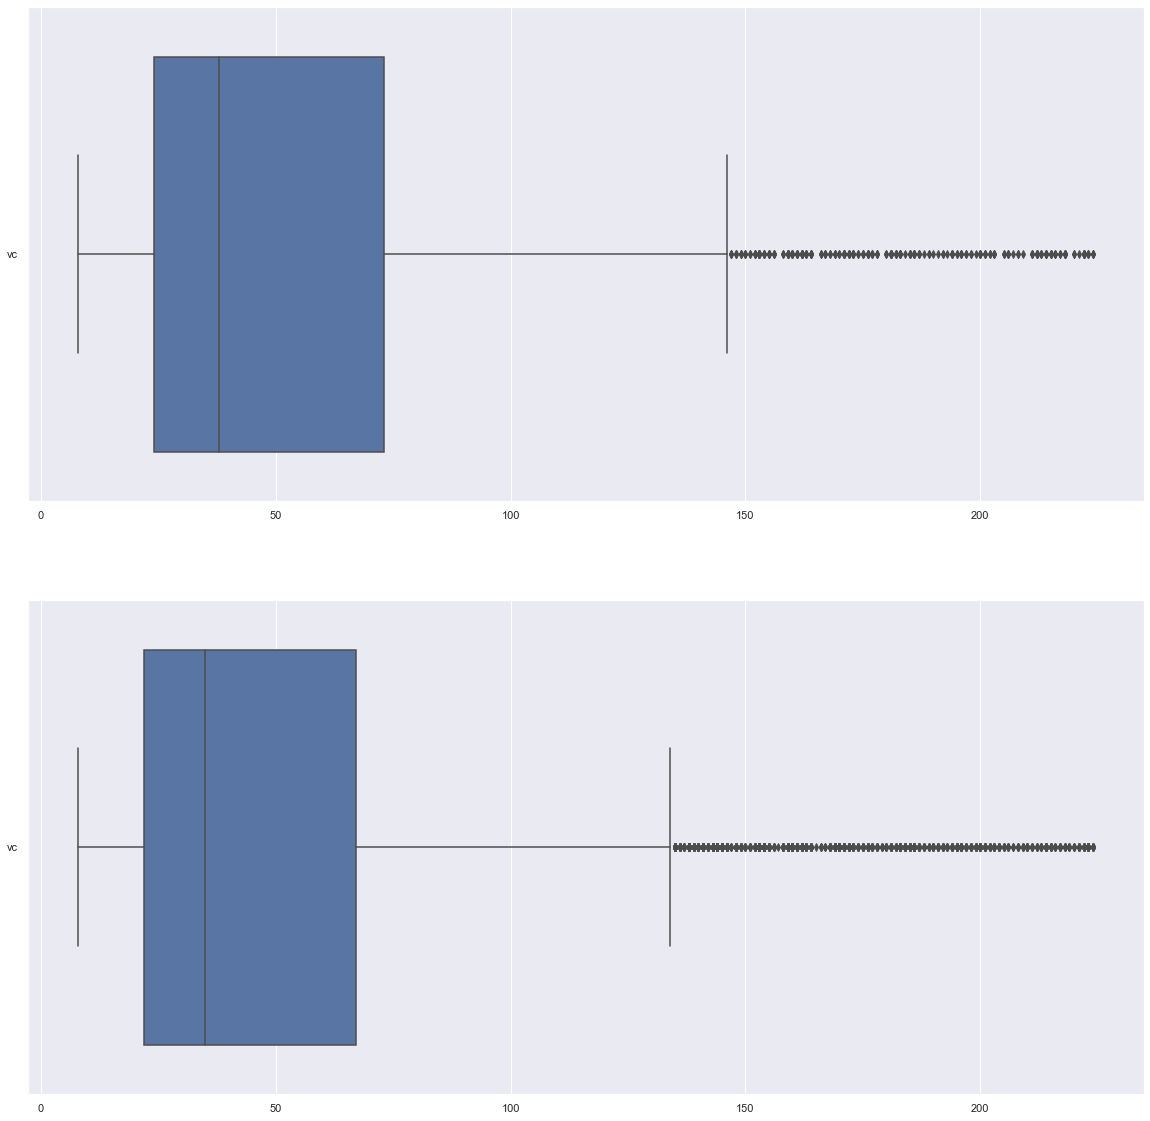

In [257]:
title_VC = traindata[['title','viewer_count']].copy()
eTitleList = []
neTitleList = []
evcList=[]
nevcList=[]

title = title_VC['title']
vc = title_VC['viewer_count']


outlierindices = sorted(outlierindices, reverse=True)
#print(outlierindices)

title.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)  

vc.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True) 
print(len(vc))
#print(title.index)
#print(len(title))
for i,x in enumerate(title):
    #print(x.index)
    if(type(x)==float):
        continue
    #print(x)
    flag=0
    for ch in x:
        #print(ch)
        if ch in emoji.UNICODE_EMOJI['en']:
            #print('x')
            flag=1
            break
    if flag==1:
        eTitleList.append(x)
        #print(vc[i])
        evcList.append(vc[title.index[i]])
    else:
        neTitleList.append(x)
        nevcList.append(vc[title.index[i]])
        
print(len(eTitleList))
emojiDict = {'title':eTitleList, 'vc':evcList}
emojiDF = pd.DataFrame(emojiDict)
emojiDF.describe()

nonemojiDict = {'title':neTitleList, 'vc':nevcList}
nonemojiDF = pd.DataFrame(nonemojiDict)
nonemojiDF.describe()

f, axes = plt.subplots(2,1, figsize = (20,20))
sb.boxplot(data=emojiDF, orient="h", ax=axes[0])
sb.boxplot(data=nonemojiDF, orient="h", ax=axes[1])


#print(eTitleList)
#print(evcList)
#print(noEmojiList)